<a href="https://colab.research.google.com/github/Dev-06-06/stock_price_prediction-using-ML-model/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the yfinance library
!pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Define the stock ticker and data range
ticker = 'MSFT'
start_date = '2015-01-01'
end_date = '2025-01-01'

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)

# We will focus on the 'Close' price
df = data[['Close']]
print(df.head())

/tmp/ipython-input-1123271267.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           MSFT
Date                 
2015-01-02  39.933052
2015-01-05  39.565830
2015-01-06  38.985119
2015-01-07  39.480442
2015-01-08  40.641876


In [3]:
# 1. Scale the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# 2. Create Training Data and Sequences
training_data_len = int(np.ceil(len(scaled_data) * 0.8)) # Use 80% for training

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
time_steps = 60

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, 0]) # x_train contains 60 days of data
    y_train.append(train_data[i, 0])              # y_train contains the 61st day's price

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for the LSTM model (requires 3 dimensions: samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
# Build the LSTM model
model = Sequential()

# Layer 1
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Layer 2
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# An epoch is one full pass through the training data
# Batch size is the number of samples to process before updating the model
model.fit(x_train, y_train, batch_size=32, epochs=20)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0197
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0015
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0013
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0011
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 9.8038e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 9.2837e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 9.4727e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9.5070e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0011
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.6907e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 7.6646e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 8.2601e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.4993e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 7.5340e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━

In [5]:
# Create the test dataset
test_data = scaled_data[training_data_len - time_steps:, :]

x_test = []
y_test = scaled_data[training_data_len:, :] # The actual "ground truth" values

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0])

# Convert to numpy array and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


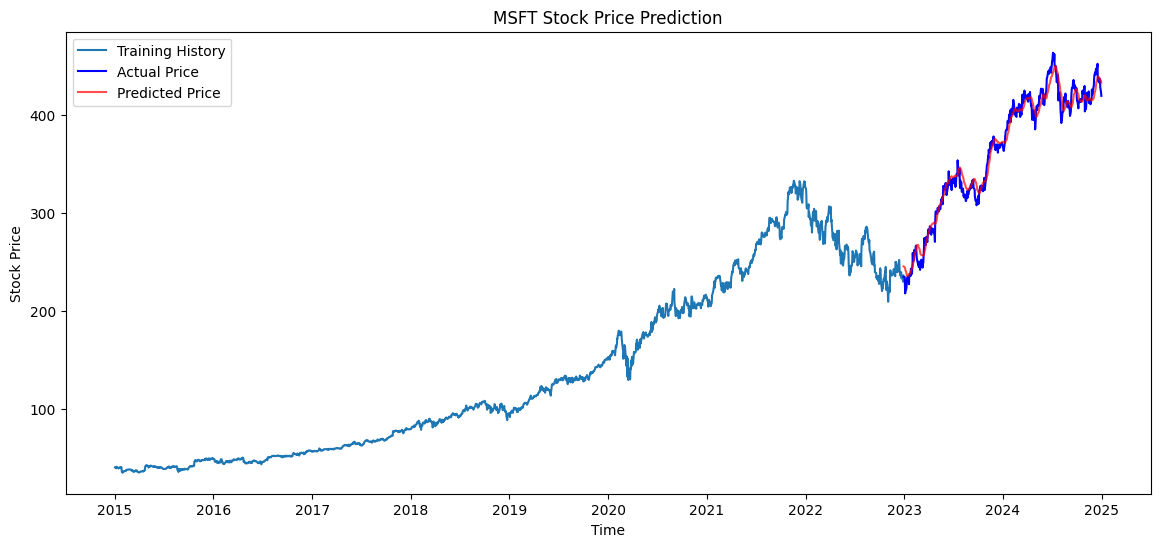

Price            Close Predictions
Ticker            MSFT            
Date                              
2024-12-24  436.929108  437.066284
2024-12-26  435.715790  436.256195
2024-12-27  428.177216  435.500763
2024-12-30  422.508362  434.340851
2024-12-31  419.196564  432.688019


In [6]:
# Get the model's predicted prices
predictions = model.predict(x_test)

# **Important:** We must "un-scale" the predictions to get the actual price values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 6))
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Get the correct date range for plotting
train = df[:training_data_len]
valid = df[training_data_len:].copy() # Use .copy() to avoid SettingWithCopyWarning
valid['Predictions'] = predictions

plt.plot(train['Close'], label='Training History')
plt.plot(valid['Close'], label='Actual Price', color='blue')
plt.plot(valid['Predictions'], label='Predicted Price', color='red', alpha=0.7)
plt.legend()
plt.show()

# Print the last few predicted vs actual prices
print(valid[['Close', 'Predictions']].tail())